In [1]:
import requests
requests.get('https://www.google.com', timeout=10).ok

True

In [2]:
from kaggle_environments import make
env = make('chess', debug=True)

termcolor not installed, skipping dependency
No pygame installed, ignoring import



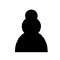
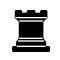
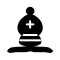
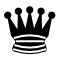
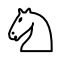
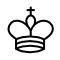
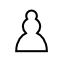
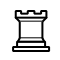
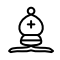
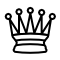
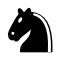
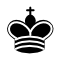

In [3]:
result = env.run(["cfish_link.py", "cfish_link.py"])
env.render(mode="ipython", width=1000, height=1000)
moves = [i[0]['observation']['lastMove'] for i in result]

In [23]:
print(result)

[[{'action': '', 'reward': 0, 'info': {}, 'observation': {'remainingOverageTime': 10, 'step': 0, 'board': 'rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1', 'mark': 'white', 'opponentRemainingOverageTime': 10, 'lastMove': ''}, 'status': 'ACTIVE'}, {'action': '', 'reward': 0, 'info': {}, 'observation': {'remainingOverageTime': 10, 'mark': 'black', 'opponentRemainingOverageTime': 10, 'lastMove': '', 'board': 'rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1'}, 'status': 'INACTIVE'}], [{'action': 'e2e4', 'reward': 0, 'info': {}, 'observation': {'remainingOverageTime': 9.539566, 'step': 1, 'board': 'rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR b KQkq e3 0 1', 'mark': 'white', 'opponentRemainingOverageTime': 10, 'lastMove': 'e2e4'}, 'status': 'INACTIVE'}, {'action': '', 'reward': 0, 'info': {}, 'observation': {'remainingOverageTime': 10, 'mark': 'black', 'opponentRemainingOverageTime': 10, 'lastMove': 'e2e4', 'board': 'rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR b KQkq e

(191, 2)
[{'action': '', 'reward': 0, 'info': {}, 'observation': {'remainingOverageTime': 10, 'step': 0, 'board': 'rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1', 'mark': 'white', 'opponentRemainingOverageTime': 10, 'lastMove': ''}, 'status': 'ACTIVE'}, {'action': '', 'reward': 0, 'info': {}, 'observation': {'remainingOverageTime': 10, 'mark': 'black', 'opponentRemainingOverageTime': 10, 'lastMove': '', 'board': 'rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1'}, 'status': 'INACTIVE'}]
[10, 9.73045, 9.73045, 9.728492999999999, 9.676032, 9.443214999999999, 8.416065999999999, 8.416065999999999, 8.329080999999999, 8.113826999999999, 7.880242999999999, 7.238179999999999, 7.238179999999999, 6.915005999999999, 6.615793999999999, 6.615793999999999, 6.614890999999999, 6.614890999999999, 6.402784, 6.187939999999999, 6.187939999999999, 6.172943999999999, 5.9298329999999995, 5.877460999999999, 5.7533769999999995, 5.7533769999999995, 5.522937, 5.307936, 5.307936, 5.307936, 5.12

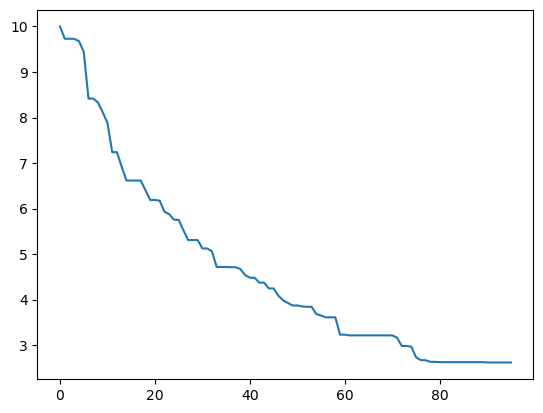

In [7]:
import matplotlib.pyplot as plt
import numpy as np
print(np.shape(result))
print(result[0])
white = result[::2]
whiteTime = [i[0]['observation'].remainingOverageTime for i in white]
plt.plot(whiteTime)
print(whiteTime)


[[{'action': '', 'reward': 0, 'info': {}, 'observation': {'remainingOverageTime': 10, 'step': 0, 'board': 'rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1', 'mark': 'white', 'opponentRemainingOverageTime': 10, 'lastMove': ''}, 'status': 'ACTIVE'}, {'action': '', 'reward': 0, 'info': {}, 'observation': {'remainingOverageTime': 10, 'mark': 'black', 'opponentRemainingOverageTime': 10, 'lastMove': '', 'board': 'rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1'}, 'status': 'INACTIVE'}], [{'action': 'e2e4', 'reward': 0, 'info': {}, 'observation': {'remainingOverageTime': 9.73045, 'step': 1, 'board': 'rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR b KQkq e3 0 1', 'mark': 'white', 'opponentRemainingOverageTime': 10, 'lastMove': 'e2e4'}, 'status': 'INACTIVE'}, {'action': '', 'reward': 0, 'info': {}, 'observation': {'remainingOverageTime': 10, 'mark': 'black', 'opponentRemainingOverageTime': 10, 'lastMove': 'e2e4', 'board': 'rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR b KQkq e3

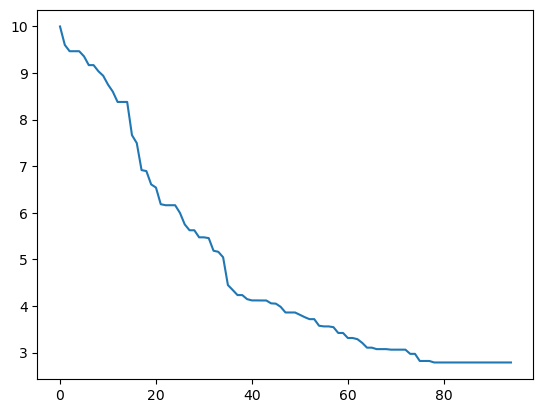

In [8]:
print(result)
black = result[1::2]
blackTime = [i[1]['observation'].remainingOverageTime for i in black]
print(blackTime)
plt.plot(blackTime)

In [4]:
# for i in range(1, len(moves)):
#     print(moves[i])

In [5]:
import chess
import chess.pgn
import io

def uci_to_pgn(uci_moves, white="White", black="Black"):
    """
    Converts a list of UCI moves to a PGN game.
    :param uci_moves: List of UCI moves.
    :param white: Name of the player with white pieces.
    :param black: Name of the player with black pieces.
    :return: PGN string.
    """
    board = chess.Board()
    game = chess.pgn.Game()
    game.headers["White"] = white
    game.headers["Black"] = black
    game.headers["Result"] = "*"

    node = game

    for move in uci_moves:
        board.push_uci(move)
        node = node.add_variation(chess.Move.from_uci(move))

    with io.StringIO() as pgn_io:
        exporter = chess.pgn.StringExporter(headers=True, variations=True, comments=True)
        pgn_io.write(game.accept(exporter))
        return pgn_io.getvalue()


In [6]:
print(uci_to_pgn(moves[1:]))

[Event "?"]
[Site "?"]
[Date "????.??.??"]
[Round "?"]
[White "White"]
[Black "Black"]
[Result "*"]

1. e4 e5 2. Nf3 Nc6 3. Bb5 a6 4. Bxc6 dxc6 5. O-O Qd6 6. d3 f6 7. Be3 Be6 8. d4
O-O-O 9. Qe2 Nh6 10. c3 Nf7 11. b4 Bg4 12. Nbd2 exd4 13. cxd4 Qe6 14. Rfb1 Nd6
15. Qd3 Bxf3 16. gxf3 Qh3 17. a4 Qh5 18. Qc3 f5 19. Bf4 fxe4 20. b5 axb5 21.
fxe4 Kd7 22. Bg3 Be7 23. d5 Rhf8 24. Re1 cxd5 25. Rac1 Ke8 26. exd5 Rf7 27. Re5
Qh6 28. Re6 Qg5 29. Qd3 Rd7 30. axb5 Nf5 31. Re5 Kf8 32. Rce1 Qg6 33. b6 cxb6
34. Qc4 Nd6 35. Qb3 Nf5 36. Nf3 Rd8 37. R5e4 Nxg3 38. hxg3 Qf6 39. Kg2 Bc5 40.
Re6 Qxf3+ 41. Qxf3 Rxf3 42. Kxf3 Rxd5 43. R6e5 Rd8 44. R1e4 g6 45. Ke2 Kg7 46.
Re8 Rd7 47. Ra8 h5 48. Ra2 Rf7 49. Rf4 Re7+ 50. Kf1 Rd7 51. Rb2 Rd5 52. Kg2 Bd6
53. Ra4 Bc5 54. f4 Kf6 55. Kh3 Kf5 56. Ra7 Rd7 57. Re2 Kf6 58. Ra8 Kg7 59. Rea2
Kf6 60. R2a7 Kf5 61. Re8 Bd6 62. Ra2 Bc5 63. Ra7 Bd6 64. Ra2 Bc5 65. Rae2 Kf6
66. Rc8 Kf7 67. Ra2 Kf6 68. Raa8 Kf5 69. Rd8 Rxd8 70. Rxd8 Ke4 71. Rd7 b5 72.
Rxb7 b4 73. Kh4 Kf3 74. Rd7 Kg2